# Teste título principal
## Teste de outra maneira
## aaaaa
#### bebebebebeb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# --- SIMULAÇÃO DO DATASET (Substitua esta parte pelo pd.read_csv) ---
# Estou criando dados falsos apenas para o código rodar aqui.
df = pd.read_csv('student_exam_scores.csv')

df = pd.DataFrame(df)
# Criando uma nota final baseada nas outras (para garantir correlação alta)
df['exam_score'] = (df['hours_studied']*2 + df['previous_scores']*0.6 + df['attendance_percent']*0.2) + np.random.normal(0, 2, len(df))
# -------------------------------------------------------------------

# Exibir as primeiras linhas
print("Visualização inicial dos dados:")
display(df.head())
print(f"\nTamanho do dataset: {df.shape}")

Visualização inicial dos dados:


,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,59.743748
1,S002,1.3,8.6,60.7,55,46.292413
2,S003,4.0,8.2,73.7,86,74.309800
3,S004,3.5,4.8,95.1,66,62.886543
4,S005,9.1,6.4,89.8,71,74.568752



Tamanho do dataset: (200, 6)


# Limpeza de Dados

In [2]:
# 1. Remover coluna irrelevante (String/ID)
if 'student_id' in df.columns:
    df = df.drop('student_id', axis=1)

# 2. Tratamento de Valores Nulos (Preencher com a média)
colunas_numericas = df.select_dtypes(include=['number']).columns
df[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].mean())

# 3. Remoção de Outliers (Método IQR)
def remover_outliers(dataframe, colunas):
    df_clean = dataframe.copy()
    for col in colunas:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= limite_inferior) & (df_clean[col] <= limite_superior)]
    return df_clean

# Aplicando a remoção de outliers
df_limpo = remover_outliers(df, df.columns)
print(f"Linhas antes da remoção de outliers: {len(df)}")
print(f"Linhas após a remoção de outliers: {len(df_limpo)}")

Linhas antes da remoção de outliers: 200
Linhas após a remoção de outliers: 200


# Análise Exploratória

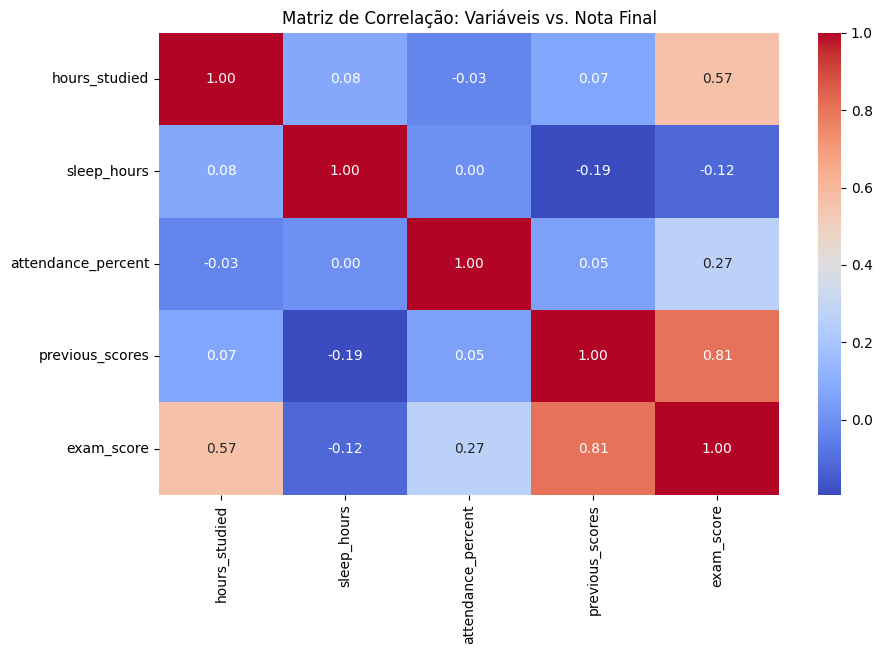

In [3]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_limpo.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação: Variáveis vs. Nota Final')
plt.show()

# Divisão e Normalização
#### Separamos os dados em conjuntos de treino (para aprendizado) e teste (para validação final). Em seguida, aplicamos a normalização MinMaxScaler para colocar todos os dados entre 0 e 1.

In [4]:
# Definindo X (entradas) e y (saída/alvo)
X = df_limpo.drop('exam_score', axis=1)
y = df_limpo['exam_score']

# Divisão Treino e Teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização (Fit no treino, Transform no treino e teste)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dados preparados e normalizados.")

Dados preparados e normalizados.


# Treinamento e Avaliação dos Modelos
####  Regressão Linear, Árvore de Decisão, SVM e MLP. Calculamos as métricas de erro (MAE, MSE, RMSE, MAPE) e o coeficiente de determinação ($R^2$) para avaliar a generalização.

In [5]:
# Dicionário para armazenar os resultados
resultados = []

# Definindo os modelos
modelos = {
    'Regressão Linear': LinearRegression(),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),
    'SVM (SVR)': SVR(kernel='linear'), # Kernel linear costuma ser bom para dados simples
    'MLP (Rede Neural)': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

print("Iniciando treinamento...\n")

for nome, modelo in modelos.items():
    # Treinar
    modelo.fit(X_train_scaled, y_train)
    
    # Prever (nos dados de teste)
    y_pred = modelo.predict(X_test_scaled)
    
    # Calcular Métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar resultados
    resultados.append({
        'Modelo': nome,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': f"{mape:.2%}",
        'R2 Score': r2
    })
    
    print(f"{nome} treinado. R2: {r2:.4f}")

# Criar DataFrame com os resultados para comparação
df_resultados = pd.DataFrame(resultados).sort_values(by='R2 Score', ascending=False)
display(df_resultados)

Iniciando treinamento...

Regressão Linear treinado. R2: 0.9700
Árvore de Decisão treinado. R2: 0.8545
SVM (SVR) treinado. R2: 0.9377
MLP (Rede Neural) treinado. R2: 0.9694


,Modelo,MAE,MSE,RMSE,MAPE,R2 Score
0,Regressão Linear,1.685732,4.695785,2.166976,2.52%,0.970016
3,MLP (Rede Neural),1.724627,4.796157,2.190013,2.60%,0.969375
2,SVM (SVR),2.444912,9.753067,3.122990,3.92%,0.937724
1,Árvore de Decisão,3.721265,22.791701,4.774065,5.95%,0.854468


# Comparação Visual
#### Visualizamos o desempenho dos modelos comparando o $R^2$

C:\Users\Thiago\AppData\Local\Temp\ipykernel_12652\2090231161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Modelo', data=df_resultados, palette='viridis')


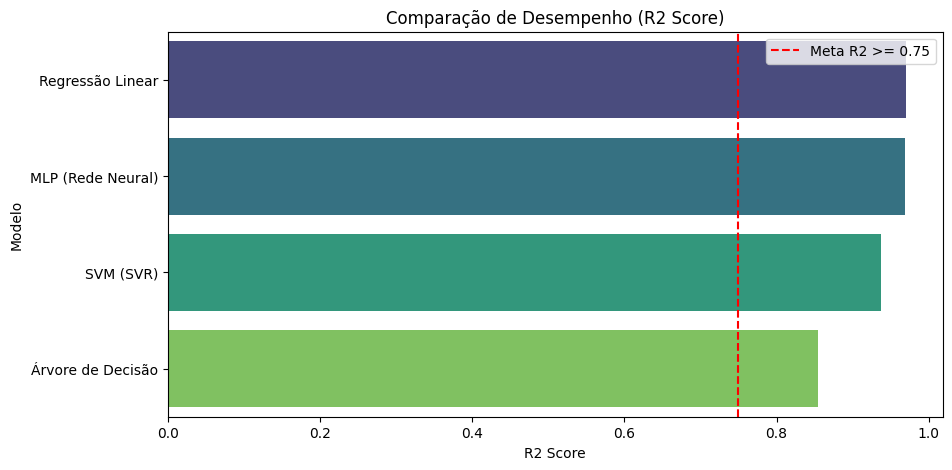

CONCLUSÃO: O melhor modelo foi 'Regressão Linear' com R2 de 0.9700.
Meta de desempenho atingida com sucesso!


In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(x='R2 Score', y='Modelo', data=df_resultados, palette='viridis')
plt.axvline(0.75, color='red', linestyle='--', label='Meta R2 >= 0.75') # Linha da meta
plt.title('Comparação de Desempenho (R2 Score)')
plt.legend()
plt.show()

# Análise textual automática do melhor modelo
melhor_modelo = df_resultados.iloc[0]
print(f"CONCLUSÃO: O melhor modelo foi '{melhor_modelo['Modelo']}' com R2 de {melhor_modelo['R2 Score']:.4f}.")
if melhor_modelo['R2 Score'] >= 0.75:
    print("Meta de desempenho atingida com sucesso!")
else:
    print("Atenção: A meta de 0.75 não foi atingida. Considere rever os dados.")